In [1]:
#importing pandas to handle dataset
import pandas as pd

In [2]:
# importing the dataset
df = pd.read_csv('train.csv')

In [3]:
#printing top 5 dataset
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


label is the output feature and all the remaining are the independent features

In [4]:
#number of rows and columns present in the dataset
df.shape

(20800, 5)

In [5]:
#checking the null value
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df.dropna(inplace= True)

In [7]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
df.reset_index(inplace = True)

In [9]:
#removing the dependent varibale
X = df.drop('label', axis = 1)
X.head(10)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [10]:
# creating the output feature
y = df['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [11]:
# Cleaning the dataset. Here we are going to use the text feature as it has more text than that of the title
# We are going to remove the stopwords like , I, me , the, is , are, etc
# we are going to convert all the sentences into the lower case
# going to vectorize the words

In [12]:
X['title'][9]

'BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage'

In [13]:
import re # regular expression to remove the unnecessary symbols
import nltk # natural language toolkit
from nltk.corpus import stopwords # unimport words list
from nltk.stem import PorterStemmer # to find stem or base of the words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer # to convert into int vectot

In [14]:
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    title = re.sub('[^a-zA-Z]', ' ', X['title'][i]) # removing everything except alphabhet
    title = title.lower()# converting to the lowercase
    title = title.split()# separating the words of the sentences
    title = [ps.stem(word) for word in title if word not in set(stopwords.words('english'))] # finding the stem word and removing the unimportnant data
    title = ' '.join(title)# combining data into the sentences
    corpus.append(title) # creating the list of the sentences

In [15]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [16]:
#converting into the Bag of Words
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [17]:
#Spliting dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [18]:
# showing the features names that has been created by the vectorizer
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

>- we can see some of the feature has one word, some has 2 and some has 3, this is because of the n_grams that we have given. we have initialied countvectorizer with the n_grams ranging from 1 to 3 which mean we will be having features with 1 word, 2 word or the 3 words.

In [20]:
#getting all the parameters used by the tokenizer
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [22]:
#showing the training dataset
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
#converting the training data into the dataframe 
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [26]:
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# model creation
from sklearn.naive_bayes import MultinomialNB # for the text data naive bayes is one of the best algorithm to use
nb_model = MultinomialNB() 

In [29]:
#fitting the model
nb_model.fit(X_train, y_train)

MultinomialNB()

In [30]:
#predicting the testing value
y_pred = nb_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=20)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[3044  345]
 [ 252 2394]]
0.9010770505385253
Confusion matrix, without normalization


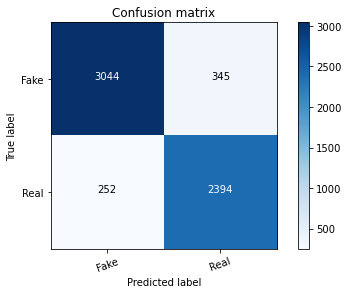

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(cm, classes=['Fake','Real'])

# Passive Aggressive Classifier Algorithm

>- this algorithm is also very good with the text data. so we can try using this algorithm.

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac_clasisfier = PassiveAggressiveClassifier(max_iter = 100)

In [46]:
pac_clasisfier.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=100)

[[3121  268]
 [ 210 2436]]
0.9207953603976802
Confusion matrix, without normalization


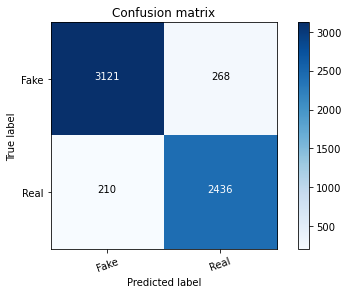

In [47]:
y_pred = pac_clasisfier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(cm,classes=['Fake','Real'])

# Multinomial Classifier with Hyperparameter

In [48]:
classifier=MultinomialNB(alpha=0.1)

In [50]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\bhuwa\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9012427506213753
Alpha: 0.2, Score : 0.9015741507870754
Alpha: 0.30000000000000004, Score : 0.9015741507870754
Alpha: 0.4, Score : 0.9007456503728252
Alpha: 0.5, Score : 0.9005799502899752
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9019055509527755
Alpha: 0.8, Score : 0.9007456503728252
Alpha: 0.9, Score : 0.9009113504556753


In [51]:
classifier.coef_[0]

array([ -9.10036605,  -8.6227385 ,  -9.10036605, ..., -10.79496178,
        -8.91464891,  -9.32862471])

In [52]:
## Get Features names
feature_names = cv.get_feature_names()

In [53]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000126376264419, 'trump'),
 (-4.287849914102974, 'hillari'),
 (-4.396366840720952, 'clinton'),
 (-4.899946945868169, 'elect'),
 (-5.176575820557189, 'new'),
 (-5.2347075860082, 'comment'),
 (-5.273945400633064, 'video'),
 (-5.386793987777445, 'war'),
 (-5.396799073738407, 'us'),
 (-5.4119969346478385, 'hillari clinton'),
 (-5.417114653084819, 'fbi'),
 (-5.4806617042015136, 'vote'),
 (-5.566232695514838, 'email'),
 (-5.578216062401935, 'world'),
 (-5.633992599859346, 'obama'),
 (-5.734478675432337, 'donald'),
 (-5.763072474799078, 'donald trump'),
 (-5.785067496384624, 'russia'),
 (-5.846201884877992, 'day'),
 (-5.862087842466802, 'america')]

In [54]:

### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.79496177525616, 'abe'),
 (-10.79496177525616, 'abroad'),
 (-10.79496177525616, 'abus new'),
 (-10.79496177525616, 'abus new york'),
 (-10.79496177525616, 'act new'),
 (-10.79496177525616, 'act new york'),
 (-10.79496177525616, 'advic'),
 (-10.79496177525616, 'advis new'),
 (-10.79496177525616, 'advis new york'),
 (-10.79496177525616, 'afford care'),
 (-10.79496177525616, 'afford care act'),
 (-10.79496177525616, 'age new'),
 (-10.79496177525616, 'age new york'),
 (-10.79496177525616, 'agenda breitbart'),
 (-10.79496177525616, 'ail'),
 (-10.79496177525616, 'airbag'),
 (-10.79496177525616, 'aleppo new'),
 (-10.79496177525616, 'aleppo new york'),
 (-10.79496177525616, 'ali'),
 (-10.79496177525616, 'america breitbart'),
 (-10.79496177525616, 'america new york'),
 (-10.79496177525616, 'ami'),
 (-10.79496177525616, 'ami schumer'),
 (-10.79496177525616, 'amp'),
 (-10.79496177525616, 'ann'),
 (-10.79496177525616, 'ann coulter'),
 (-10.79496177525616, 'announc new'),
 (-10.79496177525616,

# Using the Tfidf vectorisation

In [56]:
tfv = TfidfVectorizer(ngram_range=(1,3), max_features=5000)

In [58]:
X = tfv.fit_transform(corpus).toarray()

In [59]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
count_df = pd.DataFrame(X, columns= tfv.get_feature_names())

In [65]:
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
tfv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 0 ) 

In [67]:
model = MultinomialNB()

In [71]:
model.fit(X_train,y_train)

MultinomialNB()

In [72]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization
0.8801988400994201


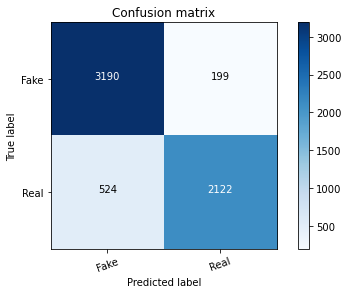

In [73]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])
print(accuracy_score(y_test, y_pred))

# HashingVectorizer

In [91]:
hs_vectorizer=HashingVectorizer(n_features=5000, alternate_sign=False )
X=hs_vectorizer.fit_transform(corpus).toarray()

In [92]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.871
Confusion matrix, without normalization


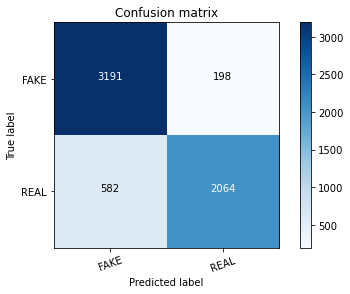

In [94]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])